<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project5:-Customer-segmentation-of-e-commerce-website" data-toc-modified-id="Project5:-Customer-segmentation-of-e-commerce-website-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project5: Customer segmentation of e-commerce website</a></span><ul class="toc-item"><li><span><a href="#Packages-imported" data-toc-modified-id="Packages-imported-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Packages imported</a></span></li><li><span><a href="#Merging-Dataset" data-toc-modified-id="Merging-Dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Merging Dataset</a></span></li></ul></li><li><span><a href="#Data-discovery-&amp;-Features-engineering" data-toc-modified-id="Data-discovery-&amp;-Features-engineering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data discovery &amp; Features engineering</a></span><ul class="toc-item"><li><span><a href="#Payment-related-features" data-toc-modified-id="Payment-related-features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Payment related features</a></span></li><li><span><a href="#Delivery-related-features" data-toc-modified-id="Delivery-related-features-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Delivery related features</a></span></li><li><span><a href="#Customer-related-features" data-toc-modified-id="Customer-related-features-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Customer related features</a></span></li><li><span><a href="#Location-features" data-toc-modified-id="Location-features-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Location features</a></span></li><li><span><a href="#Product-related-features" data-toc-modified-id="Product-related-features-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Product related features</a></span></li></ul></li><li><span><a href="#NAN-values" data-toc-modified-id="NAN-values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>NAN values</a></span></li><li><span><a href="#Focus-on-the-geo-dataset" data-toc-modified-id="Focus-on-the-geo-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Focus on the geo dataset</a></span></li><li><span><a href="#Export-the-DF" data-toc-modified-id="Export-the-DF-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Export the DF</a></span></li><li><span><a href="#Cluestering" data-toc-modified-id="Cluestering-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Cluestering</a></span></li></ul></div>

In [1]:
# #CHECK PYCODESTYLE
# %load_ext pycodestyle_magic
# %pycodestyle_off

## Project5: Customer segmentation of e-commerce website
***
The objective of this project is to determine different type of Olists' users using unsupervized algorithms.

This project will be divided into two notebooks:  
- One for the data analysis
- One dedicated to the customer segmentation

The data set can be found here:  
https://www.kaggle.com/olistbr/brazilian-ecommerce

The following notebook is dedicated to the data exploratory

Usefull ressources
https://www.kaggle.com/dmitryleshchinskiy/customer-segmentation-k-means-optics

### Packages imported

In [2]:
import numpy as np
import pandas as pd

from datetime import datetime

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, preprocessing
from sklearn.dummy import DummyClassifier

from sklearn import manifold, cluster
from sklearn.decomposition import PCA

# Graphical libraries
# %pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Merging Dataset

For getting a cleaner database, the data is divided into several dataset, that we will merge using primary keys. 
The geolocation dataset is peculiar, so we will study it separatly. 

In [3]:
# Gather the orders dataset
df_order = pd.read_csv('data/olist_orders_dataset.csv')
df_payment = pd.read_csv('data/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
df_customer = pd.read_csv('data/olist_customers_dataset.csv')
df_items = pd.read_csv('data/olist_order_items_dataset.csv')
df_products = pd.read_csv('data/olist_products_dataset.csv')
df_sellers = pd.read_csv('data/olist_sellers_dataset.csv')
geo = pd.read_csv('data/olist_geolocation_dataset.csv')

translation = pd.read_csv('data/product_category_name_translation.csv')

# Merging the different dataset with primary key
df = df_order.merge(df_payment, on='order_id', how='left')
df = df.merge(df_reviews, on='order_id', how='left')
df = df.merge(df_items, on='order_id', how='left')
df = df.merge(df_customer, on='customer_id', how='left')
df = df.merge(df_products, on='product_id', how='left')
df = df.merge(df_sellers, on='seller_id', how='left')

# df_geolocation.rename(columns={'geolocation_zip_code_prefix':'customer_zip_code_prefix'})
# df = df.merge(df_geolocation, on='zip_code_prefix', how='left')

In [4]:
# print(df.columns)
# print(df_customer.columns)

In [5]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP


In [6]:
# # print(len(df.columns),df.columns)
# print(df_order.columns)
# print(df_payment.columns)
# print(df_reviews.columns)
# print(df_customer.columns)
# print(df_items.columns)
# print(df_products.columns)
# print(df_sellers.columns)
# print(df_geolocation.columns)
df.columns
df.describe()

,payment_sequential,payment_installments,payment_value,review_score,order_item_id,price,freight_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,119148.000000,119148.000000,119148.000000,119151.000000,118318.000000,118318.000000,118318.000000,119151.000000,116609.000000,116609.000000,116609.000000,118298.000000,118298.000000,118298.000000,118298.000000,118318.000000
mean,1.094731,2.941426,172.735670,3.998514,1.196530,120.649109,20.032587,35033.953253,48.767402,785.950441,2.205113,2112.302803,30.264865,16.619994,23.074896,24442.245322
std,0.730117,2.777992,267.770023,1.412529,0.699467,184.107686,15.836559,29823.224176,10.033526,652.571474,1.717418,3786.673988,16.188992,13.453771,11.749216,27572.843192
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.850000,0.000000,1003.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,1.000000,1.000000,60.850000,3.000000,1.000000,39.900000,13.080000,11250.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,1.000000,2.000000,108.160000,5.000000,1.000000,74.900000,16.280000,24240.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,1.000000,4.000000,189.240000,5.000000,1.000000,134.900000,21.180000,58475.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000
max,29.000000,24.000000,13664.080000,5.000000,21.000000,6735.000000,409.680000,99990.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 39 columns):
order_id                         119151 non-null object
customer_id                      119151 non-null object
order_status                     119151 non-null object
order_purchase_timestamp         119151 non-null object
order_approved_at                118974 non-null object
order_delivered_carrier_date     117065 non-null object
order_delivered_customer_date    115730 non-null object
order_estimated_delivery_date    119151 non-null object
payment_sequential               119148 non-null float64
payment_type                     119148 non-null object
payment_installments             119148 non-null float64
payment_value                    119148 non-null float64
review_id                        119151 non-null object
review_score                     119151 non-null int64
review_comment_title             14189 non-null object
review_comment_message           51250 non-null 

## Data discovery & Features engineering

When have information regarding the customer product, delivery, review and payement. We will study all the different type of data available.

In [8]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

**Order Status**

Most of the orders are delivered, we will not study the other ones, since we would like to study the actual user of the company. 

In [9]:
# print(df['order_status'].unique())
for i in df['order_status'].unique():
    print(i,":",sum(df['order_status']==i))

delivered : 115731
invoiced : 378
shipped : 1256
processing : 376
unavailable : 652
canceled : 750
created : 5
approved : 3


In [10]:
idx_drop = df[df['order_status']!='delivered'].index
df.drop(index=idx_drop,inplace=True)
df.reset_index(inplace=True,drop=True)

### Payment related features

**Price, payement value and freight value distribution**

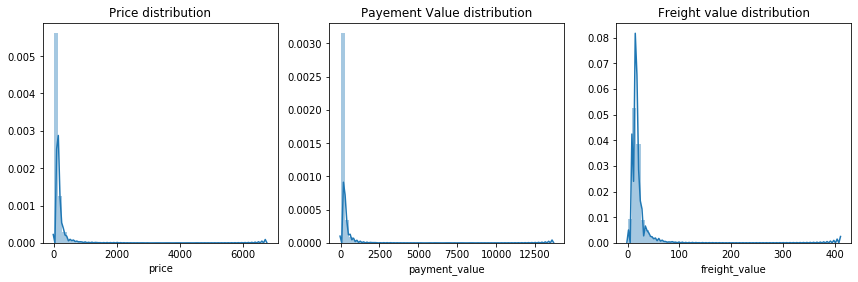

In [11]:
#Price distribution
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.distplot(df['price'].dropna(),ax=ax1)
ax1.set_title('Price distribution')

sns.distplot(df['payment_value'].dropna(),ax=ax2)
ax2.set_title('Payement Value distribution')

sns.distplot(df['freight_value'].dropna(),ax=ax3)
ax3.set_title('Freight value distribution')

plt.tight_layout
fig.tight_layout(pad=1.0)

Since the three distribution have a high skewness, we can pass the log function to have a better representation. The log repartition seems to be similar to a gaussien distribution.

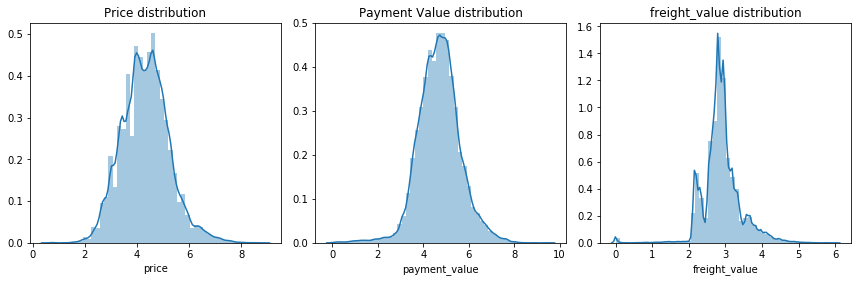

In [12]:
#Plot Log distribution
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.distplot(np.log(df['price'].dropna()+1),ax=ax1)
ax1.set_title('Price distribution')

sns.distplot(np.log(df['payment_value'].dropna()+1),ax=ax2)
ax2.set_title('Payment Value distribution')

sns.distplot(np.log(df['freight_value'].dropna()+1),ax=ax3)
ax3.set_title('freight_value distribution')

plt.tight_layout
fig.tight_layout(pad=1.0)

**Total Price**

For some orders, we have several items bought. When we have only one item bought be paid in several times, we don't want to sum the prices since the price is still the same (cf bellow example). So first we need to identify the order with several items bought, then sums the price for these orders, and keep only one price for the other. 

In [13]:
print(df.groupby(by='order_id')['order_item_id'].count()['e6ce16cb79ec1d90b1da9085a6118aeb'])
print(df.groupby(by='order_id')['order_item_id'].sum()['e6ce16cb79ec1d90b1da9085a6118aeb'])
df[['order_id','payment_value','price','freight_value','payment_sequential','order_item_id']][12:14]

2
3.0


,order_id,payment_value,price,freight_value,payment_sequential,order_item_id
12,e6ce16cb79ec1d90b1da9085a6118aeb,259.06,99.0,30.53,1.0,1.0
13,e6ce16cb79ec1d90b1da9085a6118aeb,259.06,99.0,30.53,1.0,2.0


In [14]:
print(df.groupby(by='order_id')['order_item_id'].count()['e481f51cbdc54678b7cc49136f2d6af7'])
print(df.groupby(by='order_id')['order_item_id'].sum()['e481f51cbdc54678b7cc49136f2d6af7'])
df[['order_id','payment_value','price','freight_value','payment_sequential','order_item_id']][:3]

3
3.0


,order_id,payment_value,price,freight_value,payment_sequential,order_item_id
0,e481f51cbdc54678b7cc49136f2d6af7,18.12,29.99,8.72,1.0,1.0
1,e481f51cbdc54678b7cc49136f2d6af7,2.00,29.99,8.72,3.0,1.0
2,e481f51cbdc54678b7cc49136f2d6af7,18.59,29.99,8.72,2.0,1.0


In [15]:
#Get order id with more that 1 item purchased
a = pd.DataFrame(df.groupby(by='order_id')['order_item_id'].sum() > df.groupby(by='order_id')['order_item_id'].count())

#Get sum price
a['sum_price'] = df.groupby(by='order_id')['price'].sum()

#Transform the dataframe so that it can be merge with the original df
a['order_id'] = a.index
a = a.reset_index(drop=True)
a.columns = ['more_one_item','sum_price','order_id']
df = df.merge(a, on='order_id', how='left')

In [16]:
#Get the total price, if more than one item, sum the price of each item
def total_price(row):
    if row['more_one_item']:
        return row['sum_price']
    else:
        return row['price']

df['total_price'] = df.apply(lambda row: total_price(row), axis=1)

#Drop the redundant columns
df.drop(columns=['more_one_item','sum_price'],inplace = True)
del a

**Freight percentage compare to total value**

We can guess that some cities don't have an easy access, which explained why we have some outliers in the freight percentage.

In [17]:
#Get the freight percentage of a product
df['freight_percentage'] = df['freight_value']/df['total_price']*100

# df['freight_percentage'] = df['freight_percentage'].apply(lambda x: x if x<100 else 100)

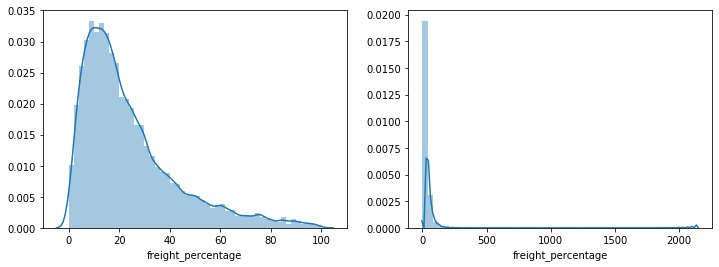

In [18]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# ax2 = fig.add_subplot(122)
sns.distplot(df['freight_percentage'][df['freight_percentage']<100],ax=ax1)
sns.distplot(df['freight_percentage'],ax=ax2)
plt.show()
# sns.distplot(np.log(1+a['freight_value']/a['price']*100),ax=ax2)

In [19]:
# #Checking of value where freight % is higher than 100%
# df[['order_id','total_price','payment_installments','payment_value','price','freight_value']][df['freight_percentage']>200][:10]
df[['order_id','payment_value','price','freight_value']][df['order_id']=='a4907d55de6b9e1bbeffd51d8ea317bf']

,order_id,payment_value,price,freight_value
1904,a4907d55de6b9e1bbeffd51d8ea317bf,79.31,18.9,60.41


**Payment type, payment installment and payment sequential**

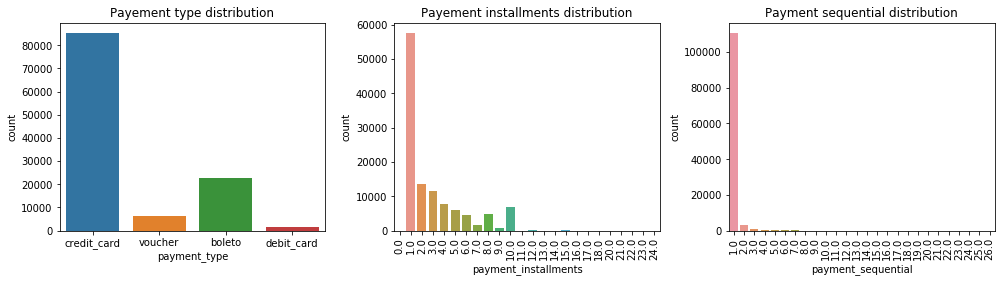

In [20]:
#Price distribution
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.countplot(df['payment_type'],ax=ax1)
ax1.set_title('Payement type distribution')

df['payment_installments'] = df['payment_installments'].apply(lambda x: x if x!=0 else 0)
g1 = sns.countplot(df['payment_installments'].dropna(),ax=ax2)
ax2.set_title('Payement installments distribution')
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)

sns.countplot(df['payment_sequential'],ax=ax3)
ax3.set_title('Payment sequential distribution')

plt.xticks(rotation=90)
plt.tight_layout(pad=1.0)
# fig.tight_layout(pad=3.0)

In [21]:
# for i in df['payment_type'].unique():
#     print(i,":",sum(df['payment_type']==i))

# print("---Payment Installments---")
# for i in sorted(df['payment_installments'].unique())[:5]:
#     print(i,":",sum(df['payment_installments']==i))

# print("---Payment Sequential---")
# for i in sorted(df['payment_sequential'].unique())[:5]:
#     print(i,':',sum(df['payment_sequential']==i))

Since the majority of the installment are 3 or less, we will regroup it into a +4 category.  
As for the payment_sequential, we will convert it into a categorical feature, either the payment is higher than 1 or not.

In [22]:
#Convert payment installments
df['payment_installments'] = df['payment_installments'].apply(lambda x: x if (x<4 and x!=0) else (4 if x!=0 else 1))
df['payment_installments'] = df['payment_installments'].astype('category',copy=False)

#Convert payment sequential, 0 if the 1 time payment, 1 if it is sequential
df['payment_sequential'] = df['payment_sequential'].apply(lambda x: 0 if (x<2 and x!=0) else 1)

# #Transform into categories
# df['payment_installments'] = pd.cut(df['payment_installments'],bins=[1,2,3,4],labels=["1","2","3","+4"])

In [23]:
# #Transform this two categories with a get dummies
df = pd.get_dummies(df,columns=['payment_installments','payment_type'])

### Delivery related features

**Get the delivery time and difference between expected delivery and actual delivery**

We can guess that the more a customer is waiting, the less happy he will be about the service. The same goes for the difference between the delivery estimated and the actual delivery.  
The following features extract the number of days for the delivery and the difference between actual and predicted delivery.

In [24]:
#Transform into datetime
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

#Days between the order and the actual delivery
df['order_delivery_time'] = df['order_delivered_customer_date'] - df['order_approved_at']
df['order_delivery_time'] = df['order_delivery_time'].apply(lambda x: x.days if x!=np.datetime64('NaT') else np.datetime64('NaT'))

#Days between the estimated delivery and the order
df['order_estimated_delivery_time'] = df['order_estimated_delivery_date'] - df['order_approved_at']
df['order_estimated_delivery_time'] = df['order_estimated_delivery_time'].apply(lambda x: x.days if x!=np.datetime64('NaT') else np.datetime64('NaT'))

#Difference between estimated delivery and actual delivery
df['order_estimated_delivery_vs_actual'] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date']
df['order_estimated_delivery_vs_actual'] = df['order_estimated_delivery_vs_actual'].apply(lambda x: x.days if x!=np.datetime64('NaT') else np.datetime64('NaT'))

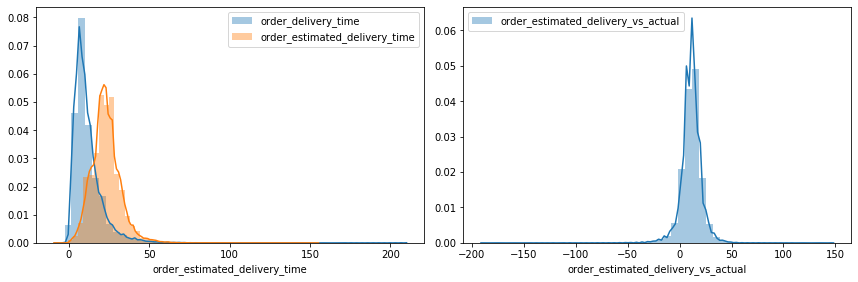

In [25]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(df['order_delivery_time'].dropna(),ax=ax1,label='order_delivery_time')
sns.distplot(df['order_estimated_delivery_time'].dropna(),ax=ax1,label='order_estimated_delivery_time')
sns.distplot(df['order_estimated_delivery_vs_actual'].dropna(),ax=ax2,label='order_estimated_delivery_vs_actual')
ax1.legend()
ax2.legend()
fig.tight_layout(pad=1.0)

### Customer related features

**Score review**  
We have more than 60% of Olist's clients that are satisfied. For this study, we will consider a client satisfied if the score is 4 or 5, and unsatisfied for the other.

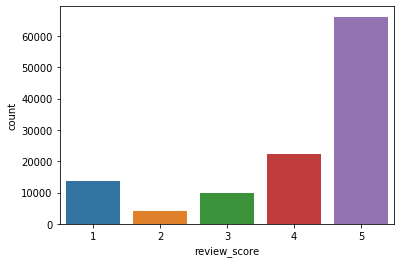

In [26]:
ax1 = sns.countplot(df['review_score'])

In [27]:
df['review_score'] = df['review_score'].apply(lambda x: 1 if x>3 else 0)

**Lenght of message review**  
Usually the people which write a review are the ones that are unsatisfied. Hence the lenght of the message should give us a good idea about the customer satisfaction. We can guess that the longer the message is, the more disatisfied a customer is.

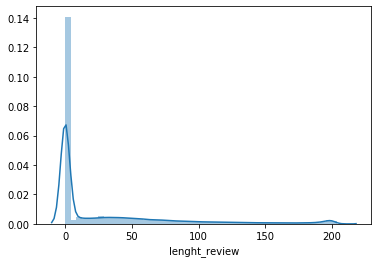

In [28]:
df['lenght_review'] = df['review_comment_message'].apply(lambda x: len(str(x)) if str(x)!='nan' else 0)
sns.distplot(df['lenght_review'])
plt.show()

We can guess that we have several type of users:
- The ones that didn't write a customer review
- The ones that write a small review
- The one that write long review  
So we transform this feature into a the following one.  
**BETTER THAT OR GET DUMMIES???**

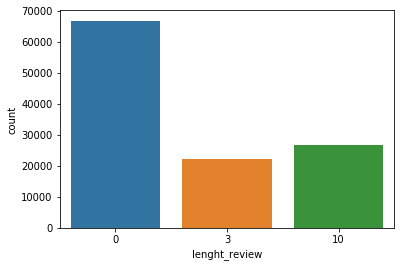

In [29]:
df['lenght_review'] = df['lenght_review'].apply(lambda x: x if x==0 else (3 if x<50 else 10))
sns.countplot(df['lenght_review'])
plt.show()

**Number of items per order**

In [30]:
group = df.groupby(by='order_id')['order_item_id']
df['number_item_per_order'] = group.transform("max")

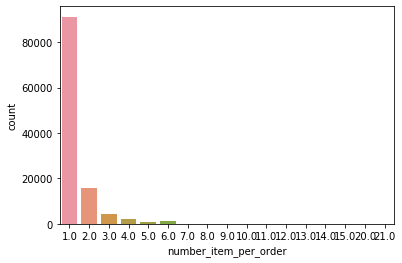

In [31]:
sns.countplot(df['number_item_per_order'])
plt.show()

**Number of command per client**

**PROBLEM NOT THE SAME RESULT IF WE TAKE THE CUSTOMER OR MERGED DATAFRAME**

In [32]:
df[df.customer_unique_id=='7c396fd4830fd04220f754e42b4e5bff']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_value,...,payment_installments_4.0,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,order_delivery_time,order_estimated_delivery_time,order_estimated_delivery_vs_actual,lenght_review,number_item_per_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,18.12,...,0,0,1,0,0,8.0,15.0,7.0,10,1.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,2.00,...,0,0,0,0,1,8.0,15.0,7.0,10,1.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,18.59,...,0,0,0,0,1,8.0,15.0,7.0,10,1.0
72122,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,0,44.11,...,0,0,1,0,0,1.0,10.0,9.0,10,1.0


In [33]:
print(df_customer.groupby('customer_unique_id').size()['7c396fd4830fd04220f754e42b4e5bff'])
print(df.groupby('customer_unique_id').size()['7c396fd4830fd04220f754e42b4e5bff'])

2
4


**PROBLEM THIS SHOULD ONLY BE 2**

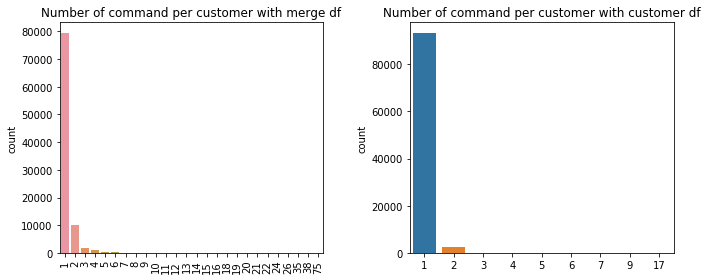

In [34]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#Compare results
g1 = sns.countplot(df.groupby('customer_unique_id').size(),ax=ax1)
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)
ax1.set_title('Number of command per customer with merge df')

sns.countplot(df_customer.groupby('customer_unique_id').size(),ax=ax2)
ax2.set_title('Number of command per customer with customer df')

plt.tight_layout()

In [35]:
# a = df.groupby('customer_unique_id').size().reset_index().drop_duplicates()
# a.columns = ['customer_unique_id','number_command']

# df = df.merge(a, on='customer_unique_id', how='left')
# df['number_command'] = df.groupby(['customer_unique_id']).transform(np.size)

### Location features

**Difference between seller_state and customer_state**

As we can see, in more that 2/3 cases, the seller is in a different state. We will have a binary feature that tells if the customer and seller are in the same state.

In [36]:
# df[['customer_state','seller_state']]
print(f"{np.sum([df['customer_state']!=df['seller_state']])/df.index.size*100:.1f}% of seller state different from customer state")

63.9% of seller state different from customer state


In [37]:
# print(df['customer_state'].nunique(),df['seller_state'].nunique())
df['state_diff'] = np.array(df['customer_state']!=df['seller_state'])
df['state_diff'] = df['state_diff'].apply(lambda x:1 if x==True else 0)

df['customer_state'] = df['customer_state'].astype('category',copy=False)
df['seller_state'] = df['seller_state'].astype('category',copy=False)

**Zip Codes**

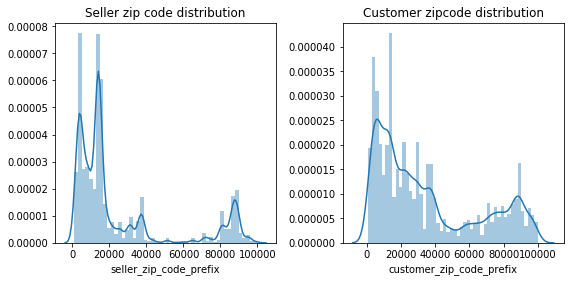

In [38]:
# np.sum([df['seller_zip_code_prefix']==df['customer_zip_code_prefix']])

#Customer and Seller zip code distribution
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)

sns.distplot(df['seller_zip_code_prefix'].dropna(),ax=ax1)
ax1.set_title('Seller zip code distribution')

sns.distplot(df['customer_zip_code_prefix'].dropna(),ax=ax2)
ax2.set_title('Customer zipcode distribution')

plt.tight_layout
fig.tight_layout(pad=1.0)

**Customers location**

We will consider the 10 most states and combine the remaining states into an 'other' category. We can assume that the remaining categories are less populated states.

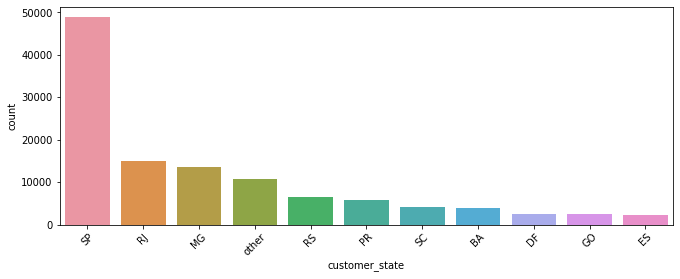

In [39]:
count_states = df['customer_state'].value_counts()
count_states = count_states[:10]
df['customer_state'] = df['customer_state'].apply(lambda x: x if x in count_states else 'other')

fig = plt.figure(figsize=(11,4))
sns.countplot(x='customer_state',data=df,order=df['customer_state'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

The same reasoning goes for the customer city. We can assume that the cities with the bigger order are big citties, we will group the smaller cities into a 'other' category.

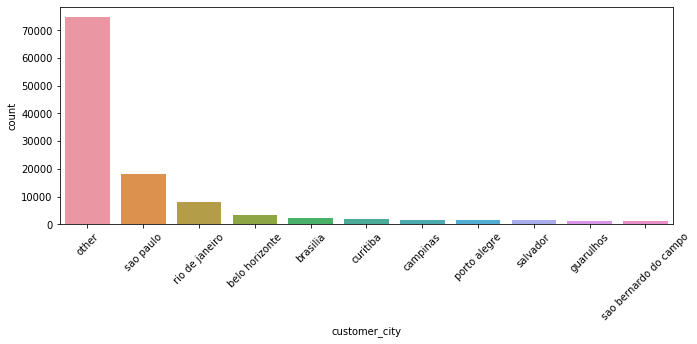

In [40]:
count_city = df['customer_city'].value_counts()
cities = count_city[:10]

#Take only the biggest cities and convert the rest into "other" city
df['customer_city'] = df['customer_city'].apply(lambda x: x if x in cities else 'other')

#Plot distribution
fig = plt.figure(figsize=(11,4))
sns.countplot(x='customer_city',data=df,order=df['customer_city'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [41]:
#Convert into dummies categories
df = pd.get_dummies(df,columns=['customer_state','customer_city'])

### Product related features

**Remove sub categories**

As we can see, several categories are similar, and can be categorized as one bigger category. For instance the construcao_ferramentas_iluminacao and construcao_ferramentas_construcao have the same root, hence we can make the hypothesis that they are part of the bigger category construcao.

In [42]:
df = df.merge(translation, how='left',on='product_category_name')

In [43]:
#Some categories are subcategories, we will only take the global category
df['product_category_name_english'] = df['product_category_name_english'].apply(lambda x: str(x).split('_')[0])

print(df['product_category_name_english'].nunique())
print(df['product_category_name_english'].unique())

52
['housewares' 'perfumery' 'auto' 'pet' 'stationery' 'furniture' 'office'
 'garden' 'computers' 'bed' 'toys' 'construction' 'telephony' 'health'
 'electronics' 'baby' 'cool' 'watches' 'air' 'sports' 'books' 'small'
 'food' 'luggage' 'fashion' 'nan' 'musical' 'costruction' 'home' 'market'
 'agro' 'party' 'cds' 'industry' 'consoles' 'fixed' 'drinks' 'kitchen'
 'audio' 'cine' 'art' 'christmas' 'tablets' 'la' 'flowers' 'dvds'
 'signaling' 'fashio' 'diapers' 'music' 'arts' 'security']


In [44]:
#Regroup the categories into a larger category
cat = {"art" : ['art', 'arts','cine','music','books','musical','fashio'],
"house" : ['housewares', 'garden','home','kitchen','bed','furniture','stationery','flowers','security','luggage'],
"electronics" : ['telephony', 'computers', 'electronics', 'consoles', 'tablets','cds','dvds','audio','signaling'],
"industry" : ['auto','construction','costruction'],
"baby" : ['baby','diapers','toy','toys'],
"health" : ['sport','air','health','food','drinks'],
"gift" : ['watches','christmas','fashion'],
"others":['market', 'agro', 'party', 'fixed', 'la','small','cool' ]}

def get_cat(x):
    if str(x)=='nan':
        return x
    else:
        for i,v in cat.items():
            if str(x) in v:
                return i
            
df['product_category_name_english'] = df['product_category_name_english'].apply(lambda x: get_cat(x) if get_cat(x) is not None else x)

#Check result
print(df['product_category_name_english'].unique())

['house' 'perfumery' 'industry' 'pet' 'office' 'electronics' 'baby'
 'health' 'others' 'gift' 'sports' 'art' 'nan']


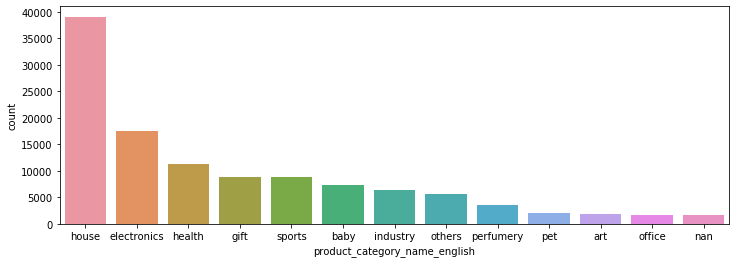

In [45]:
fig = plt.figure(figsize=(12,4))
ax = sns.countplot(x='product_category_name_english', data=df, order=df['product_category_name_english'].value_counts(ascending=False).index)
# ax.set_xticklabels(labels=df['product_category_name_english'].value_counts(ascending=False).index.index,rotation=45) 
plt.show()

In [46]:
df = pd.get_dummies(df,columns=['product_category_name_english'])

## NAN values

We have two columns with lots of missing values. Since we will not have use NLP and they are not relevant to thhis project, we will remove those features.  
As for the rest, we have less than 2% of missing data, so we will remove the missing data from the data set.

In [47]:
df[df.columns[df.isna().sum()>0]].isna().sum()

order_approved_at                         15
order_delivered_carrier_date               2
order_delivered_customer_date              8
payment_value                              3
review_comment_title                  101980
review_comment_message                 66767
product_category_name                   1638
product_name_lenght                     1638
product_description_lenght              1638
product_photos_qty                      1638
product_weight_g                          20
product_length_cm                         20
product_height_cm                         20
product_width_cm                          20
order_delivery_time                       23
order_estimated_delivery_time             15
order_estimated_delivery_vs_actual         8
dtype: int64

In [48]:
df.drop(columns=['review_comment_title','review_comment_message'],inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

In [49]:
df[df.columns[df.isna().sum()>0]].isna().sum()

Series([], dtype: float64)

## Focus on the geo dataset

There are some outliers coordinates in the dataset that are outside of brazilian territory. Lets guarantee that all coordinates are within a rectangle delimited by the limits of Brazil.
https://www.kaggle.com/andresionek/geospatial-analysis-of-brazilian-e-commerce

In [50]:
# Removing some outliers
#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo = geo[geo.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo = geo[geo.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo = geo[geo.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo = geo[geo.geolocation_lng <=  -34.79314722]

In [51]:
# transforming the prefixes to int for plotting purposes
geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(int)

# geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix'].apply(lambda x: int(str(x)[:1]))
# geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix'].apply(lambda x: int(str(x)[:2]))
# geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix'].apply(lambda x: int(str(x)[:3]))
# geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix'].apply(lambda x: int(str(x)[:4]))

# geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix_1_digits'].astype(int)
# geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix_2_digits'].astype(int)
# geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix_3_digits'].astype(int)
# geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix_4_digits'].astype(int)

In [52]:
from datashader.utils import lnglat_to_meters as webm
#Transform latitude & longitude into x,y location
x, y = webm(geo.geolocation_lng, geo.geolocation_lat)
geo['x'] = pd.Series(x)
geo['y'] = pd.Series(y)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
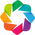

In [53]:
# plot wtih holoviews + datashader - bokeh with map background
import holoviews as hv
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
# output_notebook()
hv.extension('bokeh')

%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)

T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img

In [54]:
brazil = geo
agg_name = 'geolocation_zip_code_prefix'
brazil[agg_name].describe().to_frame()

plot_map(brazil, 'Zip Codes in Brazil', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (geolocation_zip_code_prefix)

## Export the DF

In [55]:
columns_unused = ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp','order_approved_at', 
 'order_delivered_carrier_date','order_delivered_customer_date', 
 'order_estimated_delivery_date', 'review_id','order_item_id','product_id', 
 'seller_id', 'shipping_limit_date','product_category_name', 'product_name_lenght',
 'product_description_lenght', 'product_photos_qty', 'product_weight_g',
 'product_length_cm', 'product_height_cm', 'product_width_cm','seller_zip_code_prefix', 
 'seller_city','seller_state','customer_unique_id','review_creation_date','review_answer_timestamp','customer_zip_code_prefix']

df_cleaned = df.drop(columns=columns_unused)

In [57]:
import os
#Export the cleaned data into a csv file
if os.path.exists("data/cleaned_dataframe.csv"):
    os.remove('data/cleaned_dataframe.csv')
    export_csv = df_cleaned.to_csv (r'data/cleaned_dataframe.csv', index = None, header=True)
else:
    export_csv = df_cleaned.to_csv (r'data/cleaned_dataframe.csv', index = None, header=True)

## Cluestering

k-means, CAH, DBSCAN
https://www.definitions-marketing.com/definition/segmentation-rfm/
RFM Marketing


- *types de paiements*
- *payment_installments*
- *categories de produits*
- montants moyens min, max de commandes, de produits

https://marcellodelbono.it/en/rfm-segmentation-of-your-customer-base/

In [ ]:
columns = df.columns
# x_columns = [i for i in columns if(df[i].dtypes=='int64' or df[i].dtypes=='float64' or df[i].dtypes=='uint8') and i!='review_score']

x_columns= df.drop(columns = columns_unused)
#Standardization
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(df[x_columns])

# del data_set
X_std.shape

In [ ]:
df_subset = df[x_columns+['review_score']].copy()
#Test of a PCA
pca = PCA(n_components=10)
pca_result = pca.fit_transform(X_std)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [ ]:
# fig = px.scatter_3d(df_subset.reset_index(), x='pca-one', y='pca-two', z='pca-three',
#                     color='review_score', labels={'color':'review_score'}, hover_data=['review_score'])
# fig.update_layout(title="PCA colored by review_score")
# fig.show()

In [ ]:
fig = px.scatter(df_subset.reset_index(), x='pca-one', y='pca-two',
                    color='review_score', labels={'color':'review_score'}, 
                 hover_data=['review_score'])
fig.update_layout(title="PCA colored by review_score")
fig.show()

In [ ]:
# For reproducability of the results
#Get N random index
N = 1000
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
idx_random = rndperm[:N]
df_subset1 = df.iloc[idx_random,:].copy()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=300, init='pca')
X_tsne = tsne.fit_transform(X_std[idx_random])

df_subset1['tsne-2d-one'] = X_tsne[:,0]
df_subset1['tsne-2d-two'] = X_tsne[:,1]

In [ ]:
fig = px.scatter(df_subset1.reset_index(), x='tsne-2d-one', y='tsne-2d-two',
                    color='order_estimated_delivery_vs_actual', labels={'color':'order_delivery_time'}, 
                 hover_data=['order_estimated_delivery_vs_actual'])
fig.update_layout(title="TSNE colored by review_score")
fig.show()

In [ ]:
# plt.figure(figsize=(10,6))
# sns.scatterplot(
#     x="tsne-2d-one", y="tsne-2d-two",
#     hue='review_score',
#     data=df_subset1,
#     legend="full",
#     alpha=0.3
# )

In [ ]:
#Compare pca & tsne

plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue='review_score',
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='review_score',
    data=df_subset1,
    legend="full",
    alpha=0.3,
    ax=ax2
)
plt.tight_layout()
# ax3 = plt.subplot(1, 3, 3)
# sns.scatterplot(
#     x="tsne-pca50-one", y="tsne-pca50-two",
#     hue="y",
#     palette=sns.color_palette("hls", 10),
#     data=df_subset,
#     legend="full",
#     alpha=0.3,
#     ax=ax3
# )